In [9]:
!pip install gensim


   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
    --------------------------------------- 0.5/24.0 MB 1.3 MB/s eta 0:00:19
   - -------------------------------------- 0.8/24.0 MB 1.3 MB/s eta 0:00:19
   - -------------------------------------- 1.0/24.0 MB 1.3 MB/s eta 0:00:18
   -- ------------------------------------- 1.3/24.0 MB 1.3 MB/s eta 0:00:18
   -- ------------------------------------- 1.6/24.0 MB 1.3 MB/s eta 0:00:18
   --- ------------------------------------ 1.8/24.0 MB 1.2 MB/s eta 0:00:18
   --- ------------------------------------ 2.1/24.0 MB 1.2 MB/s eta 0:00:18
   --- ------------------------------------ 2.4/24.0 MB 1.2 MB/s eta 0:00:18
   --- ------------------------------------ 2.4/24.0 MB 1.2 MB/s eta 0:00:18
   ---- ----------------------------------- 2.6/24.0 MB 1.2 MB/s eta 0:00:18
   ---- ----------------------------------- 2.9/24.0 MB 1.2 MB/s eta 0:00:18
   ----- ----

  You can safely remove it manually.
  You can safely remove it manually.


In [11]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

In [13]:
df = pd.read_json('News_Category_Dataset_v3.json', lines=True)
print(df.head())

                                                link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog y

In [15]:
print(df.columns)

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')


In [17]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    return text

df['text'] = df['headline'] + ' ' + df['short_description']
df['text'] = df['text'].apply(clean_text)

sentences = df['text'].apply(nltk.word_tokenize).tolist()

In [25]:
model = Word2Vec(
    sentences,
    vector_size=100,  
    window=5,         
    min_count=5,      
    workers=4,       
    sg=1  
)

In [26]:
words_to_check = ['data', 'government', 'health', 'technology', 'economy']
for word in words_to_check:
    if word in model.wv:
        print(f"\nTop 5 words similar to '{word}':")
        similar_words = model.wv.most_similar(word, topn=5)
        for sim_word, score in similar_words:
            print(f" {sim_word} ({score:.2f})")
    else:
        print(f"\n'{word}' not found in vocabulary.")



Top 5 words similar to 'data':
 database (0.76)
 information (0.74)
 surveys (0.71)
 estimate (0.70)
 breaches (0.70)

Top 5 words similar to 'government':
 governments (0.76)
 asylumseekers (0.74)
 visas (0.74)
 pentagon (0.73)
 unilaterally (0.72)

Top 5 words similar to 'health':
 mental (0.78)
 healthcare (0.75)
 care (0.74)
 endoflife (0.74)
 dental (0.72)

Top 5 words similar to 'technology':
 gaming (0.74)
 digital (0.74)
 technologies (0.74)
 computing (0.73)
 automation (0.72)

Top 5 words similar to 'economy':
 manufacturing (0.74)
 economies (0.74)
 volatility (0.73)
 infrastructure (0.73)
 recession (0.72)


In [27]:
vocab = list(model.wv.index_to_key)[:100]  # first 100 words
X = model.wv[vocab]

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

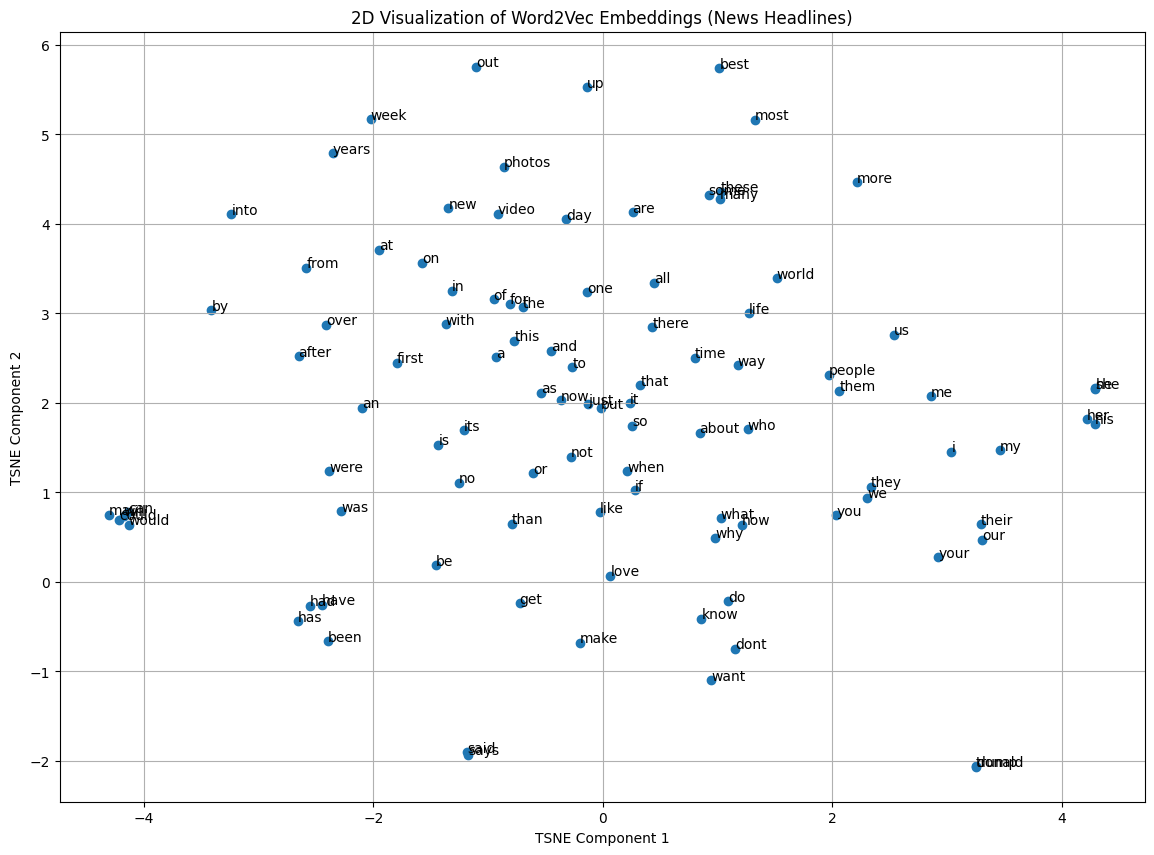

In [28]:
plt.figure(figsize=(14, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
for i, word in enumerate(vocab):
    plt.annotate(word, (X_tsne[i, 0], X_tsne[i, 1]))
    
plt.title("2D Visualization of Word2Vec Embeddings (News Headlines)")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.grid(True)
plt.show()
